
# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
Here, I have used the No Show Appointment Dataset .
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
To Investigate the dataset I have framed below mentioned questions for the analysis -
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
  I What is the probability of appointee to show up for appointment ?
  

In [47]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

##### Loading the CSV file

In [48]:
df = pd.read_csv('No_Show_appointment.csv')#Loading CSV file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### As we can see there is no Missing value in the dataset ,so we not need to replace any values in the rows .

### Data Cleaning 
> Changing the ScheduledDay and AppointmentDay column to date time 

In [49]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']) # Changing String column to date time 
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])# Changing String column to date time 

##### Changing the column name to fix the typos 

In [50]:
df.rename(columns={'AppointmentID':'AppointmentId',
                   'Handcap':'Handicap', 
                   'Hipertension':'Hypertension',
                    'No-show':'No_show'}, 
          inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentId     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


##### Checking for duplicacy of any row

In [51]:
sum(df.duplicated()) #Finding total number of duplicate rows 

0

##### As we can see no duplicate row found in the dataset 

##### Mapping the No_Show column to 0 (Showed up) and 1(Not shown) from 'yes' and 'No'

In [52]:
df['No_show']=df['No_show'].map({'No':0,
                                 'Yes':1}
                               )
print(df['No_show'])

0         0
1         0
2         0
3         0
4         0
5         0
6         1
7         1
8         0
9         0
10        0
11        1
12        0
13        0
14        0
15        0
16        0
17        1
18        0
19        0
20        1
21        1
22        1
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
110497    0
110498    0
110499    0
110500    0
110501    0
110502    0
110503    0
110504    0
110505    0
110506    0
110507    0
110508    0
110509    0
110510    0
110511    0
110512    0
110513    0
110514    0
110515    1
110516    1
110517    0
110518    0
110519    0
110520    0
110521    0
110522    0
110523    0
110524    0
110525    0
110526    0
Name: No_show, Length: 110527, dtype: int64


##### Checking the range for 'Age' to check the accuraccy in age i.e the age should not exceed 100 


In [53]:
print ("Age range: ",sorted(df['Age'].unique()))

Age range:  [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


##### Here we can see the age range starts from -1 to 115 .Hence we need to keep the age range between 0 to 100 and removind other .

Text(0.5,1,'Age Histogram')

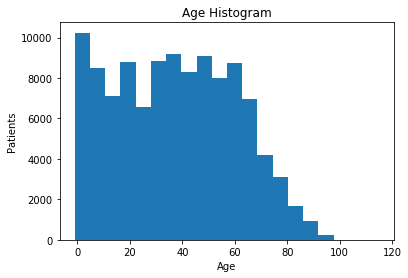

In [54]:
# Let us see the Age histogram 
plt.figure();
age_hist = df['Age'].plot.hist(bins=20)
age_hist.set_xlabel("Age")
age_hist.set_ylabel("Patients")
age_hist.set_title('Age Histogram')

##### From above histogram ,we can see the patient aged above 100 and below 0 are few and hence we filter the data

In [55]:
df = df[(df.Age >= 0) & (df.Age <= 100)] # Finding out Age range within data

min_age = df['Age'].min()
max_age = df['Age'].max()
print ("Minimum age range is {} and maximum age range is {}.".format(min_age, max_age))

Minimum age range is 0 and maximum age range is 100.


##### Now we will analyze the patients based on gender 

Text(0.5,1,'Distribution of Gender')

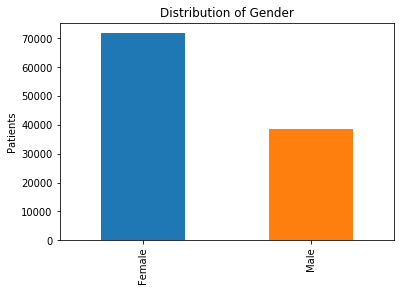

In [56]:
gender_dist = df['Gender'].value_counts().plot.bar()
gender_dist.set_xticklabels(["Female", "Male"])
gender_dist.set_ylabel("Patients")
gender_dist.set_title('Distribution of Gender')

##### Adding some analytical columns to out dataset for further exploration

In [57]:
#Number of appointments missed by patient 
df['Num_App_Missed'] = df.groupby('PatientId')['No_show'].apply(lambda x: x.cumsum())

In [58]:
#Day of week when appointment was made
df['DayOfWeek'] = pd.to_datetime(df['AppointmentDay']).apply(lambda x: x.isoweekday())



<a id='eda'></a>
## Exploratory Data Analysis



### Attributes responsible for show up 

In [59]:
# Calculate how many SMS has been received 
df.groupby('SMS_received')['No_show'].mean()# grouping data on the basis of SMS received and no show .


SMS_received
0    0.167009
1    0.275753
Name: No_show, dtype: float64

##### Percentage  of patients who didnt show up for appointment 

In [60]:
no_show_appointment = df['No_show'].value_counts()#Finding out count of patients who have showed and not showed for appointment 
print(no_show_appointment)

percent_noshow = no_show_appointment[1]/ no_show_appointment.sum() * 100
print('Patient percent who missed appointment ', percent_noshow)

0    88203
1    22316
Name: No_show, dtype: int64
Patient percent who missed appointment  20.19200318497272


### Probability for patient to show up 

In [61]:
def prob_show(dataset, group_by):    
    df = pd.crosstab(index = dataset[group_by], columns = dataset['No_show']).reset_index()
    # calc probability of showing up 0 means show up , 1 means missed
    df['probShowUp'] = df[0] / (df[1] + df[0])
    return df[[group_by, 'probShowUp']]

##### First we will find probability of a patient to show up at an appointment based on Age, Num_App_Missed, AwaitingTime.

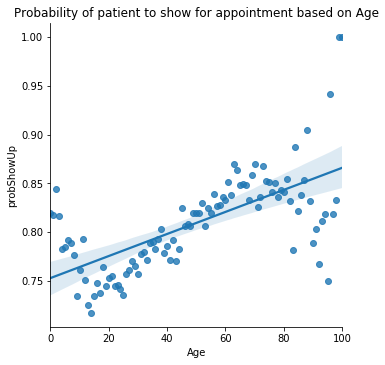

In [62]:
sns.lmplot(data = prob_show(df, 'Age'), x = 'Age', y = 'probShowUp', fit_reg = True,palette = 'Set2')
plt.xlim(0, 100)
plt.title('Probability of patient to show for appointment based on Age')
plt.show()

#####  No-show rate of medical appointments is highly dependent on the age of the appointee,ages from 14 to 24 years have higher cancellations rate. 


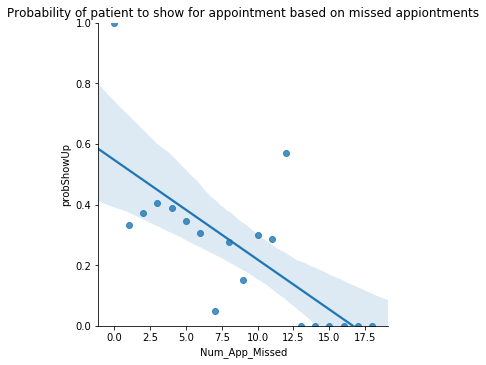

In [63]:
## Probability of showing up based on number of appointment missed 

sns.lmplot(data = prob_show(df, 'Num_App_Missed'), x = 'Num_App_Missed', 
           y = 'probShowUp', fit_reg = True)
plt.title('Probability of patient to show for appointment based on missed appiontments')
plt.ylim(0, 1)
plt.show()

##### Clearly the number of appointment missed is one of the factor that patient show up for appointment or not 

#### Probability of patient to show up on the basis of disease and scholarship 

In [64]:
def probability(df, group_by):
    rows = []
    for item in group_by:
        for level in df[item].unique():
            row = {'Category': item}
            total = len(df[df[item] == level])
            n = len(np.array(df[(df[item] == level) & (df['No_show'] == 0)], dtype = bool))
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)

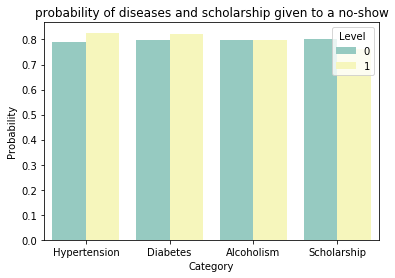

In [65]:
sns.barplot(data = probability(df,['Hypertension', 'Diabetes', 'Alcoholism', 'Scholarship']),
            x = 'Category', y = 'Probability', hue = 'Level', palette = 'Set3',ci='sd')
plt.title('probability of diseases and scholarship given to a no-show')
plt.ylabel('Probability')
plt.show()

##### here we can see the probability of show up depend on hypertension and Scholarship

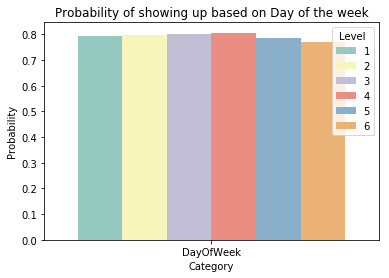

In [66]:
# Probability of showing up on the basis of day of week 
sns.barplot(data = probability(df,['DayOfWeek']),
            x = 'Category', y = 'Probability', hue = 'Level', palette = 'Set3')
plt.title('Probability of showing up based on Day of the week')
plt.ylabel('Probability')
plt.show()

#### The probability of show up decrease on weekend 

<a id='conclusions'></a>
## Conclusions

Although the data provided was suffiecient for analysis still there is a  Missing features which may have been useful to this analysis could be whether a patient in the past has been a no-show, or a patient's post-code, or whether the patient is employed or unemployed or even the reason they scheduled an appointment.By using feature importances on a decision tree the top 5 most important features are Age, Scholarship, Hypertension, Diabetes, and Alcoholism which are not that intuitive except for age (teenagers/elderly).
